In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# Generate fake data
n_samples = 20
slope, intercept = 2.3, 0.1
x_data = np.random.uniform(size=n_samples)
y_data = x_data*x_data*slope + x_data*slope + intercept + np.random.normal(size=n_samples, scale=0.2)

In [47]:
x = tf.placeholder("float")
y = tf.placeholder("float")
slope = tf.Variable(np.random.randn(), name="slope")
intercept = tf.Variable(np.random.randn(), name="intercept")

model = x*x*slope + x*slope + intercept
cost = tf.reduce_sum(tf.pow(model - y, 2)) 
print(cost)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

Tensor("Sum_16:0", dtype=float32)


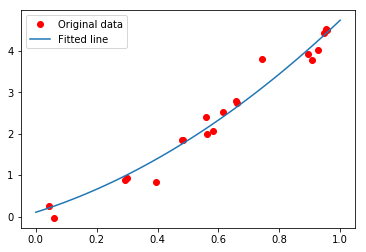

In [48]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(500):
        sess.run(optimizer, feed_dict={x: x_data, y: y_data})
        #print("slope={}, intercept={}".format(sess.run(slope), sess.run(intercept)))

    plt.plot(x_data, y_data, 'ro', label='Original data')
    plx = np.linspace(0, 1)
    plt.plot(plx, sess.run(slope)*plx*plx + sess.run(slope)*plx + sess.run(intercept), label='Fitted line')
    plt.legend()
    plt.show()